In [1]:
from framework import Framework

In [2]:
data_dir = "daily_cluster_data/daily_cluster_matrices_min_6"

fw = Framework(data_dir,verbose=1)
fw.run_experiment(5,60)

experimenting with:
 ['louvain']
creating matrices for sample_0
creating adjacency matrix with cooccurrence 0.05 seconds
creating adjacency matrix with jaccard 0.0 seconds
creating adjacency matrix with dice 0.0 seconds
creating adjacency matrix with cosine_nmf 2.69 seconds
creating adjacency matrix with cosine_svd 2.22 seconds
creating adjacency matrix with correlation 0.01 seconds
creating adjacency matrix with pmi 0.01 seconds
creating adjacency matrix with lift 0.01 seconds
creating adjacency matrix with tfidf 0.03 seconds
creating adjacency matrix with conditional 0.01 seconds
creating adjacency matrix with symmetric_conditional 0.0 seconds
creating adjacency matrix with sparse_cooccurrence 0.01 seconds
sample_0 cooccurrence louvain louvain_0
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 44, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 

In [3]:
adjacency_keys = list(fw.adjacencies['sample_0'].keys())
for key in adjacency_keys:
    print(key)
    print(fw.adjacencies['sample_0'][key]['imedinews'].sort_values(ascending=False))

cooccurrence
reportiori          1.000000
rustavi2            0.820583
1tv                 0.635701
newspress           0.606557
ipn                 0.517304
mpn                 0.389800
frontnews2          0.340619
ghn                 0.334244
tiflisnews          0.272769
postv               0.257741
bm                  0.206284
gttv                0.189435
palitranews         0.171676
accentnews          0.129326
alia                0.122951
timer               0.113388
on                  0.110656
mtavari             0.105647
tabula              0.104736
tvpirveli           0.099727
radiotavisupleba    0.091530
sova                0.076958
primetime           0.069217
sputnik             0.067851
metronome           0.065574
metronome-mix       0.062386
formula             0.062386
palitravideo        0.054189
kvirispalitra       0.050091
euronewsgeorgia     0.050091
publika             0.042805
altinfo             0.042805
bpn                 0.037796
paraleli            0.029599
a

In [4]:
one_community_detection_run = fw.results['sample_0']['cooccurrence']['louvain']['louvain_0']['communities']

In [13]:
from itertools import combinations
import pandas as pd
from partition_metrics import all_metrics

# Get all unique community detection results
all_results = []
for sample_ID, modeling_methods in fw.results.items():
    for modeling_method, comm_methods in modeling_methods.items():
        for comm_method_name, hp_dict in comm_methods.items():
            for hp_ID, result in hp_dict.items():
                all_results.append({
                    'sample_ID': sample_ID,
                    'modeling_method': modeling_method,
                    'comm_method_name': comm_method_name,
                    'hp_ID': hp_ID,
                    'communities': result['communities']
                })

# Compare each pair of results
comparison_rows = []
for r1, r2 in combinations(all_results, 2):
    coms1 = list(r1['communities'].values())
    coms2 = list(r2['communities'].values())
    
    metrics = all_metrics(coms1, coms2, verbose=0)
    
    comparison_rows.append({
        'sample1': r1['sample_ID'],
        'sample2': r2['sample_ID'],
        'method1': f"{r1['modeling_method']}_{r1['comm_method_name']}_{r1['hp_ID']}",
        'method2': f"{r2['modeling_method']}_{r2['comm_method_name']}_{r2['hp_ID']}",
        'modeling_method1': r1['modeling_method'],
        'modeling_method2': r2['modeling_method'],
        'comm_method1': r1['comm_method_name'],
        'comm_method2': r2['comm_method_name'],
        'ari': metrics['ari'],
        'nmi': metrics['nmi'],
        'norm_edit_distance': metrics['norm_edit_distance']
    })

# Create DataFrame of comparisons
comparison_df = pd.DataFrame(comparison_rows)

# Add columns to identify different types of comparisons
comparison_df['different_samples'] = comparison_df['sample1'] != comparison_df['sample2']
comparison_df['different_modeling_methods'] = comparison_df['modeling_method1'] != comparison_df['modeling_method2']
comparison_df['different_comm_methods'] = comparison_df['comm_method1'] != comparison_df['comm_method2']

# Sort by different_samples and different_modeling_methods
comparison_df = comparison_df.sort_values(['different_samples', 'different_modeling_methods', 'different_comm_methods'], 
                                        ascending=[False, False, False])

print("\nComparison Results:")
comparison_df



Comparison Results:


,sample1,sample2,method1,method2,modeling_method1,modeling_method2,comm_method1,comm_method2,ari,nmi,norm_edit_distance,different_samples,different_modeling_methods,different_comm_methods
12,sample_0,sample_1,cooccurrence_louvain_louvain_0,jaccard_louvain_louvain_0,cooccurrence,jaccard,louvain,louvain,-0.000851,0.992677,0.959184,True,True,False
13,sample_0,sample_1,cooccurrence_louvain_louvain_0,dice_louvain_louvain_0,cooccurrence,dice,louvain,louvain,-0.000851,0.992677,0.959184,True,True,False
14,sample_0,sample_1,cooccurrence_louvain_louvain_0,cosine_nmf_louvain_louvain_0,cooccurrence,cosine_nmf,louvain,louvain,-0.000851,0.992677,0.959184,True,True,False
15,sample_0,sample_1,cooccurrence_louvain_louvain_0,cosine_svd_louvain_louvain_0,cooccurrence,cosine_svd,louvain,louvain,-0.000851,0.992677,0.959184,True,True,False
16,sample_0,sample_1,cooccurrence_louvain_louvain_0,correlation_louvain_louvain_0,cooccurrence,correlation,louvain,louvain,1.000000,1.000000,1.000000,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,sample_4,sample_4,tfidf_louvain_louvain_0,symmetric_conditional_louvain_louvain_0,tfidf,symmetric_conditional,louvain,louvain,-0.000851,0.992677,0.959184,False,True,False
1766,sample_4,sample_4,tfidf_louvain_louvain_0,sparse_cooccurrence_louvain_louvain_0,tfidf,sparse_cooccurrence,louvain,louvain,0.001771,0.304156,0.061224,False,True,False
1767,sample_4,sample_4,conditional_louvain_louvain_0,symmetric_conditional_louvain_louvain_0,conditional,symmetric_conditional,louvain,louvain,0.001474,0.491563,0.306122,False,True,False
1768,sample_4,sample_4,conditional_louvain_louvain_0,sparse_cooccurrence_louvain_louvain_0,conditional,sparse_cooccurrence,louvain,louvain,-0.005337,0.189370,0.408163,False,True,False


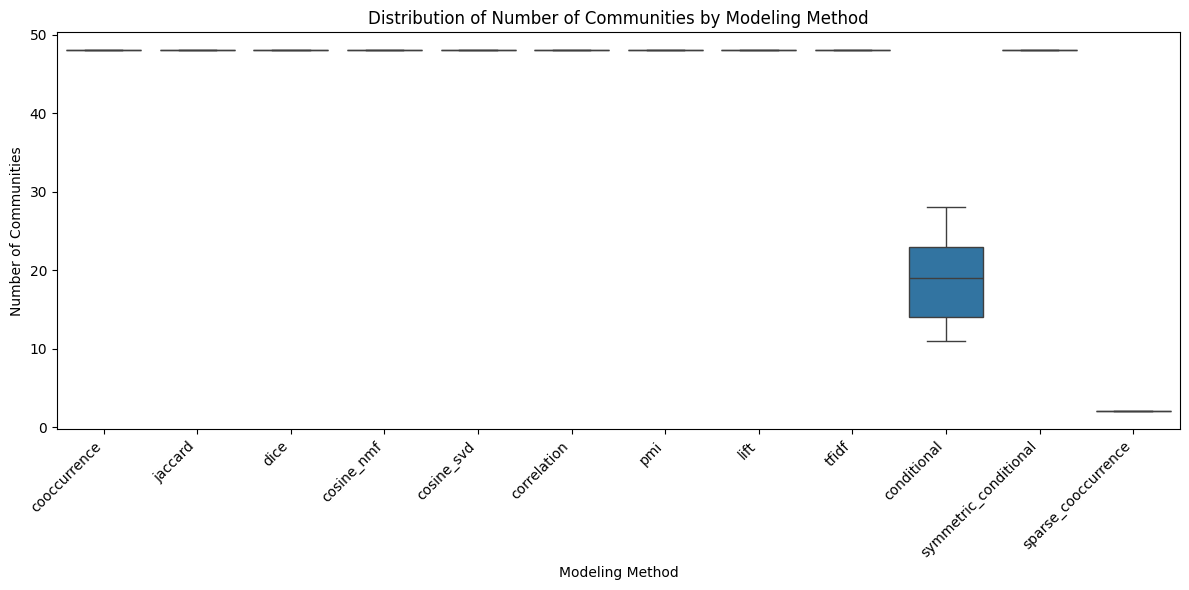


Summary Statistics:
                       count  mean       std   min   25%   50%   75%   max
modeling_method                                                           
conditional              5.0  19.0  6.819091  11.0  14.0  19.0  23.0  28.0
cooccurrence             5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
correlation              5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
cosine_nmf               5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
cosine_svd               5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
dice                     5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
jaccard                  5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
lift                     5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
pmi                      5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
sparse_cooccurrence      5.0   2.0  0.000000   2.0   2.0   2.0   2.0   2.0
symmetric_conditional    5.0  48.0  0.000000  48.0  48.0  48.0  48.0  48.0
tfid

In [8]:
# Count number of communities for each method
community_counts = []
for sample_ID, modeling_methods in fw.results.items():
    for modeling_method, comm_methods in modeling_methods.items():
        for comm_method_name, hp_dict in comm_methods.items():
            for hp_ID, result in hp_dict.items():
                # Count unique community IDs
                n_communities = len(set(result['communities'].values()))
                community_counts.append({
                    'sample_ID': sample_ID,
                    'modeling_method': modeling_method,
                    'n_communities': n_communities
                })

# Convert to DataFrame
counts_df = pd.DataFrame(community_counts)

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=counts_df, x='modeling_method', y='n_communities')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Number of Communities by Modeling Method')
plt.xlabel('Modeling Method')
plt.ylabel('Number of Communities')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(counts_df.groupby('modeling_method')['n_communities'].describe())


In [9]:
comparison_df

,sample1,sample2,method1,method2,modeling_method1,modeling_method2,comm_method1,comm_method2,ari,nmi,norm_edit_distance,different_samples,different_modeling_methods,different_comm_methods
12,sample_0,sample_1,cooccurrence_louvain_louvain_0,jaccard_louvain_louvain_0,cooccurrence,jaccard,louvain,louvain,-0.000851,0.992677,0.959184,True,True,False
13,sample_0,sample_1,cooccurrence_louvain_louvain_0,dice_louvain_louvain_0,cooccurrence,dice,louvain,louvain,-0.000851,0.992677,0.959184,True,True,False
14,sample_0,sample_1,cooccurrence_louvain_louvain_0,cosine_nmf_louvain_louvain_0,cooccurrence,cosine_nmf,louvain,louvain,-0.000851,0.992677,0.959184,True,True,False
15,sample_0,sample_1,cooccurrence_louvain_louvain_0,cosine_svd_louvain_louvain_0,cooccurrence,cosine_svd,louvain,louvain,-0.000851,0.992677,0.959184,True,True,False
16,sample_0,sample_1,cooccurrence_louvain_louvain_0,correlation_louvain_louvain_0,cooccurrence,correlation,louvain,louvain,1.000000,1.000000,1.000000,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,sample_4,sample_4,tfidf_louvain_louvain_0,symmetric_conditional_louvain_louvain_0,tfidf,symmetric_conditional,louvain,louvain,-0.000851,0.992677,0.959184,False,True,False
1766,sample_4,sample_4,tfidf_louvain_louvain_0,sparse_cooccurrence_louvain_louvain_0,tfidf,sparse_cooccurrence,louvain,louvain,0.001771,0.304156,0.061224,False,True,False
1767,sample_4,sample_4,conditional_louvain_louvain_0,symmetric_conditional_louvain_louvain_0,conditional,symmetric_conditional,louvain,louvain,0.001474,0.491563,0.306122,False,True,False
1768,sample_4,sample_4,conditional_louvain_louvain_0,sparse_cooccurrence_louvain_louvain_0,conditional,sparse_cooccurrence,louvain,louvain,-0.005337,0.189370,0.408163,False,True,False


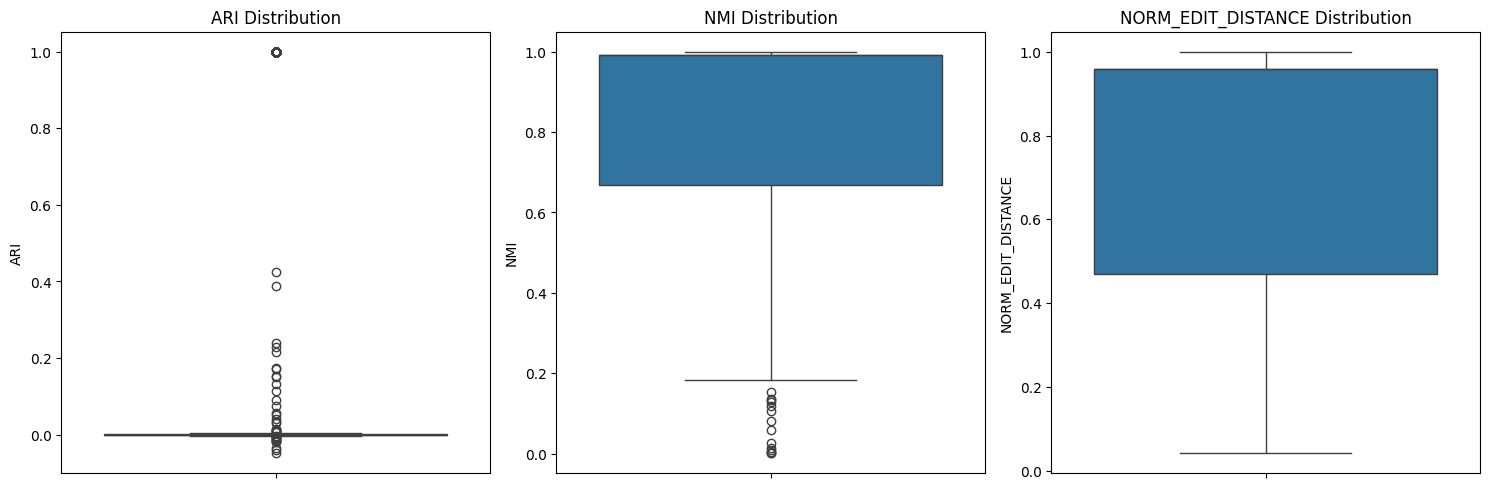

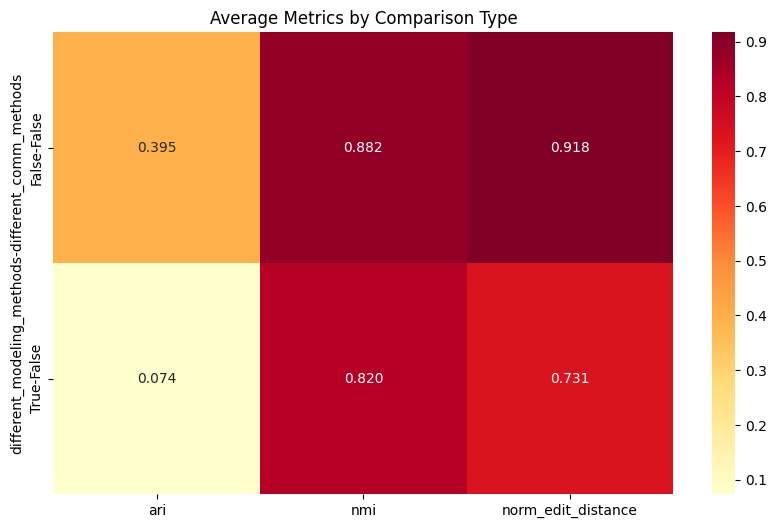

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['ari', 'nmi', 'norm_edit_distance']

for i, metric in enumerate(metrics):
    # Create boxplot showing full distribution without grouping by boolean
    sns.boxplot(data=comparison_df, 
                y=metric,
                ax=axes[i])
    
    axes[i].set_title(f'{metric.upper()} Distribution')
    axes[i].set_ylabel(metric.upper())

plt.tight_layout()
plt.show()

# Create heatmap of average metrics for different comparison types
avg_metrics = comparison_df.groupby(['different_modeling_methods', 'different_comm_methods'])[metrics].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(avg_metrics, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Average Metrics by Comparison Type')
plt.show()


In [7]:
import pandas as pd

rows = []
for sample_ID, modeling_methods in fw.results.items():
    for modeling_method, comm_methods in modeling_methods.items():
        for comm_method_name, hp_dict in comm_methods.items():
            for hp_ID, result in hp_dict.items():
                row = {
                    'sample_ID': sample_ID,
                    'modeling_method': modeling_method,
                    'comm_method_name': comm_method_name,
                    'hp_ID': hp_ID,
                    **result  # assuming result is a dict
                }
                rows.append(row)

df = pd.DataFrame(rows)
df

,sample_ID,modeling_method,comm_method_name,hp_ID,hyperparameters,communities
0,sample_0,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 1, 3: 2, 4: 0, 5: 0, 6: 5, 7: ..."
1,sample_1,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 0, 6: 3, 7: ..."
2,sample_2,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 0, 6: 3, 7: ..."
3,sample_3,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 2, 3: 3, 4: 0, 5: 0, 6: 4, 7: ..."
4,sample_4,normalized_counts,louvain,louvain_0,"{'parameter1': 5, 'parameter2': 12}","{0: 0, 1: 1, 2: 2, 3: 1, 4: 0, 5: 0, 6: 3, 7: ..."
